<a href="https://colab.research.google.com/github/isabelemoura/Estudos_IA/blob/main/Atividade_2_IA_BFS_DFS_Atualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bem-vindo ao programa de caminho com BFS/DFS!
Insira a cidade de origem: Piracicaba
Insira a cidade de destino: Porto Feliz
Escolha o algoritmo de busca (BFS ou DFS): dfs
Caminho encontrado entre Piracicaba e Porto Feliz: Piracicaba -> Americana -> Sumaré -> Campinas -> Indaiatuba -> Salto -> Itu -> Sorocaba -> Boituva -> Porto Feliz
Distância total percorrida: 164 km


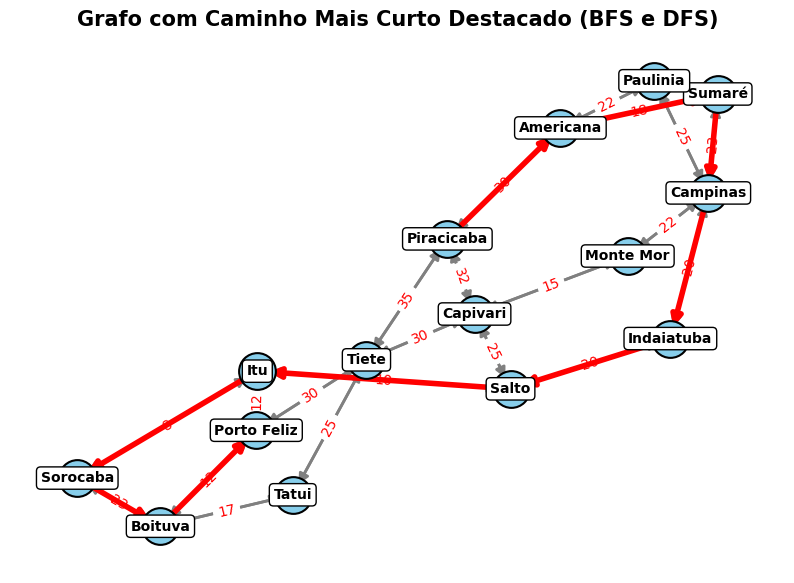

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, deque

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v, weight):
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))  # Para grafo não direcionado

    def dfs_util(self, v, visited, path, goal, total_weight):
        visited.add(v)
        path.append(v)

        if v == goal:
            return total_weight, path.copy()

        min_weight = float('inf')
        best_path = None
        neighbours = sorted(self.graph[v], key=lambda x: x[1])
        for neighbour, weight in neighbours:
            if neighbour not in visited:
                current_weight, current_path = self.dfs_util(neighbour, visited, path, goal, total_weight + weight)
                if current_weight < min_weight:
                    min_weight = current_weight
                    best_path = current_path

        path.pop()
        visited.remove(v)

        return (min_weight, best_path) if best_path else (float('inf'), None)

    def dfs(self, start, goal):
        visited = set()
        path = []
        min_weight, best_path = self.dfs_util(start, visited, path, goal, 0)

        return best_path, min_weight if min_weight != float('inf') else (None, float('inf'))

    def bfs(self, start, goal):
        visited = set()
        queue = deque([(start, 0, [start])])

        while queue:
            v, total_weight, path = queue.popleft()
            if v == goal:
                return path, total_weight

            visited.add(v)

            for neighbour, weight in self.graph[v]:
                if neighbour not in visited:
                    queue.append((neighbour, total_weight + weight, path + [neighbour]))

        return None, float('inf')

    def create_graph(self):
        G = nx.DiGraph()  # Grafo direcionado
        for origem, destinos in self.graph.items():
            for destino, peso in destinos:
                G.add_edge(origem, destino, weight=peso)
        return G

    def visualize_graph(self, G, shortest_path=None):
        plt.figure(figsize=(10, 7))
        pos = nx.spring_layout(G, k=0.5)  # Ajuste o valor de k para aumentar o espaçamento
        labels = nx.get_edge_attributes(G, 'weight')

        # Desenhar nós com cor e borda
        nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', edgecolors='black', linewidths=1.5)

        # Desenhar arestas com setas
        nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True, arrowstyle='-|>', arrowsize=15, edge_color='gray', width=2)

        # Desenhar rótulos dos nós (cidades) dentro dos círculos
        nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif', font_weight='bold',
                                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        # Desenhar rótulos de peso das arestas com um deslocamento
        edge_labels = {edge: f'{weight}' for edge, weight in labels.items()}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', label_pos=0.5)

        # Destacar o caminho mais curto em vermelho se houver
        if shortest_path:
            edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
            nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=4, arrows=True, arrowsize=15)

        plt.title("Grafo com Caminho Mais Curto Destacado (BFS e DFS)", fontsize=15, fontweight='bold')
        plt.axis('off')
        plt.show()

def encontrar_melhor_caminho():
    print("Bem-vindo ao programa de caminho com BFS/DFS!")

    g = Graph()

    # Adiciona as arestas entre as cidades com os respectivos pesos
    g.add_edge("Piracicaba", "Americana", 30)
    g.add_edge("Piracicaba", "Capivari", 32)
    g.add_edge("Piracicaba", "Tiete", 35)
    g.add_edge("Capivari", "Tiete", 30)
    g.add_edge("Capivari", "Salto", 25)
    g.add_edge("Capivari", "Monte Mor", 15)
    g.add_edge("Monte Mor", "Campinas", 22)
    g.add_edge("Americana", "Sumaré", 18)
    g.add_edge("Americana", "Paulinia", 22)
    g.add_edge("Sumaré", "Campinas", 23)
    g.add_edge("Campinas", "Indaiatuba", 20)
    g.add_edge("Campinas", "Paulinia", 25)
    g.add_edge("Paulinia", "Americana", 22)
    g.add_edge("Indaiatuba", "Salto", 20)
    g.add_edge("Salto", "Itu", 10)
    g.add_edge("Itu", "Sorocaba", 8)
    g.add_edge("Sorocaba", "Boituva", 23)
    g.add_edge("Porto Feliz", "Boituva", 12)
    g.add_edge("Tiete", "Porto Feliz", 30)
    g.add_edge("Itu", "Porto Feliz", 12)
    g.add_edge("Tiete", "Tatui", 25)
    g.add_edge("Tatui", "Boituva", 17)

    origem = input("Insira a cidade de origem: ").strip()
    destino = input("Insira a cidade de destino: ").strip()
    algoritmo = input("Escolha o algoritmo de busca (BFS ou DFS): ").strip().lower()

    if algoritmo == "bfs":
        path, total_distance = g.bfs(origem, destino)
    elif algoritmo == "dfs":
        path, total_distance = g.dfs(origem, destino)
    else:
        print("Algoritmo de busca inválido. Por favor, escolha entre BFS ou DFS.")
        return

    if path:
        print(f"Caminho encontrado entre {origem} e {destino}: {' -> '.join(path)}")
        print(f"Distância total percorrida: {total_distance} km")
        G = g.create_graph()
        g.visualize_graph(G, path)
    else:
        print(f"Não foi possível encontrar um caminho entre {origem} e {destino}")

if __name__ == "__main__":
    encontrar_melhor_caminho()
